# Generate High-Res 2D Classes

This example covers how to generate full-resolution 2D Class images for publication. The results are saved as PNG and PDF format.

First initialize the `CryoSPARC` client.

In [2]:
from cryosparc.tools import CryoSPARC

cs = CryoSPARC(host="cryoem0.sbi", base_port=61000)
assert cs.test_connection()

Connection succeeded to CryoSPARC API at http://cryoem0.sbi:61002


Load the templates output from the Select 2D job with the final selected templates.

In [2]:
project = cs.find_project("P251")
job = project.find_job("J10")
templates_selected = job.load_output("templates_selected", slots=["blob"])

This job has 15 selected templates. Each template is stored in a MRC file created by the 2D Classification job. The `templates_selected` contains the location of these. Load all the unique paths (organized by path in a Python dictionary).


In [3]:
unique_mrc_paths = set(templates_selected["blob/path"])
all_templates_blobs = {path: project.download_mrc(path)[1] for path in unique_mrc_paths}

Use matplotlib to create a 5x3 grid to display these templates. Load the MRC template image data for each template. Particles for this dataset were extracted at a box size of 386px. Use a DPI slightly higher than this to allow for margins.

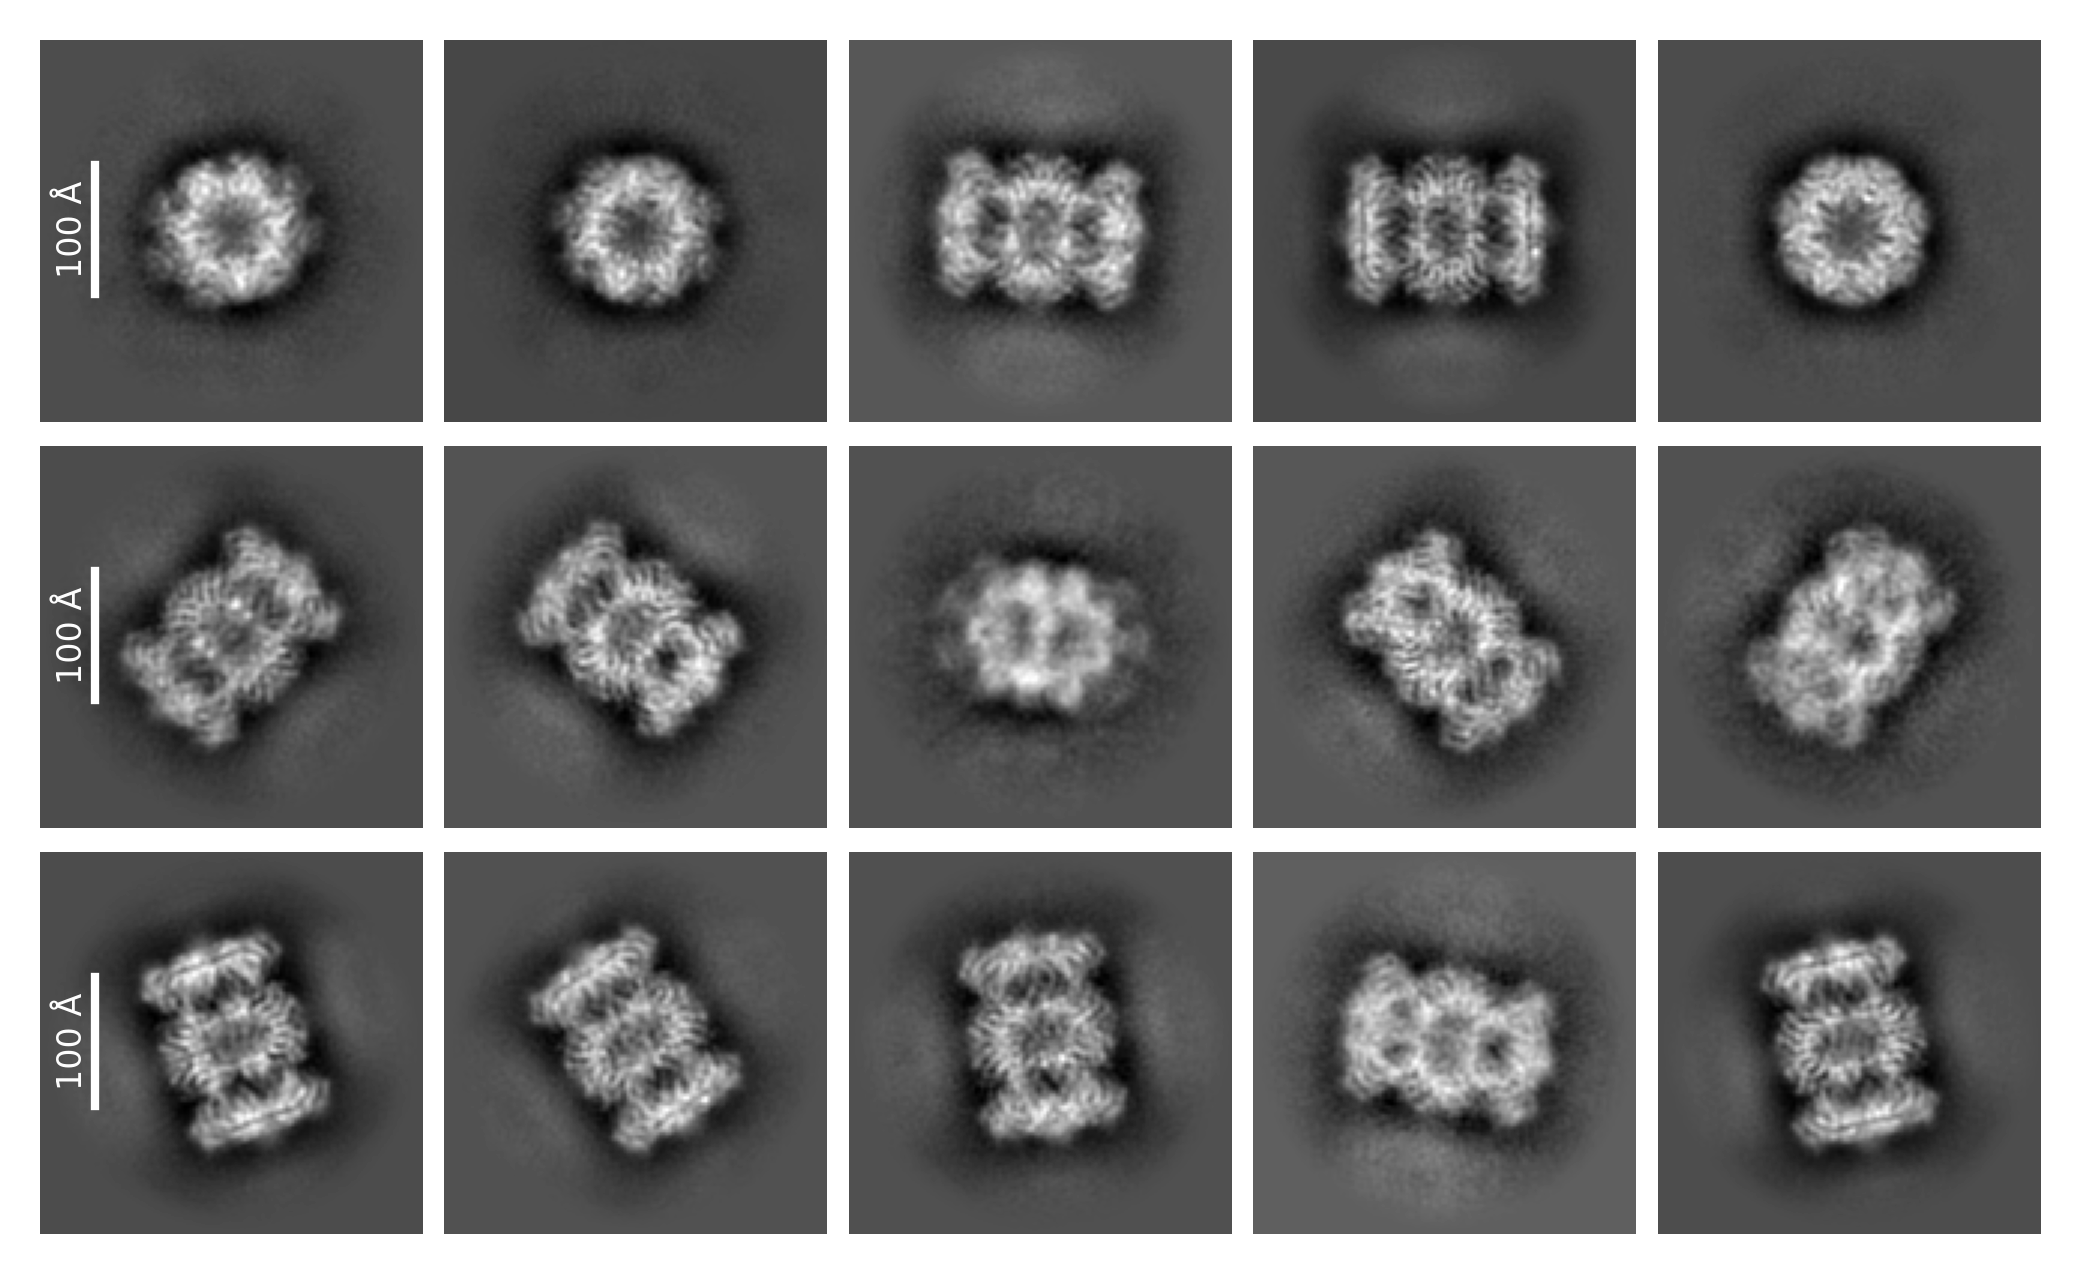

In [4]:
%matplotlib inline

from pathlib import Path

import matplotlib.pyplot as plt

N = templates_selected["blob/shape"][0][0]
scale_bar_a = 100
scale_bar_px = scale_bar_a / templates_selected["blob/psize_A"][0]  # 100 A in pixels
num_rows = 3
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols, num_rows), dpi=400)
plt.margins(x=0, y=0)

for i, template in enumerate(templates_selected.rows()):
    path = template["blob/path"]
    index = template["blob/idx"]
    blob = all_templates_blobs[path][index]
    ax = axes.flatten()[i]
    ax.axis("off")
    ax.imshow(blob, cmap="gray", origin="lower")
    if i % num_cols == 0:
        # If this template is in the first column, plot scale bar
        scale_bar_x = N // 7
        box_center = N / 2
        ax.plot(
            # draw scale bar line
            [scale_bar_x, scale_bar_x],
            [box_center + scale_bar_px / 2, box_center - scale_bar_px / 2],
            color="white",
        )
        ax.text(
            # scale bar text
            scale_bar_x - 2,  # add space between scale bar label and line
            box_center,
            "100 \u00c5",  # unicode for angstrom symbol
            rotation=90,
            horizontalalignment="right",
            verticalalignment="center",
            fontsize=6,
            color="white",
        )

fig.tight_layout(pad=0, h_pad=0.4, w_pad=0.4)
fig.savefig(Path.home() / "class2d.png", bbox_inches="tight", pad_inches=0)
fig.savefig(Path.home() / "class2d.pdf", bbox_inches="tight", pad_inches=0)

The resulting output may also be be appended to the job's event log.

In [5]:
job.log_plot(fig, text="2D Classes", raw_data="Hello,Templates", raw_data_format="txt")

'678575055650dff5dd89519d'